# Tuning the GLM and Random Forest models
### authors: Javier Lopatin & Klara Dolos
### mail: javierlopatin@gmail.com; klara.dolos@kit.de
### Manuscript: Comparing Generalized Linear Models and random forest to model vascular plant species richness using LiDAR data in a natural forest in central Chile
### last changes: 12/11/2015

## ==============================================================

### load the require packages

In [1]:
pkgs<-c("lme4", "hier.part", "splines", "MASS", "caret")
lapply(pkgs, require, character.only=T)

Loading required package: lme4
Loading required package: Matrix
Loading required package: hier.part
Loading required package: gtools
Loading required package: splines
Loading required package: MASS
Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

In [2]:
# set working directory
setwd("~/Dropbox/Publications/SpeciesRichness-GLMvsRF-LiDAR")

In [3]:
# Load data
dat <- read.table("Richness_model.csv", header=T, sep=",", dec=".")   
head(dat)

,ID,Total_richness,Tree_richness,Shrub_richness,Herb_richness,DTM_1_mean,slope_1m_std,norm_H_1_mean,Asp_1m,TWI_1m,one_mean,one_std,homogeneity_1,contrast_1,dissimilarity_1,entropy_1,second_moment_1
1,4.0000000,13.0000000,5.0000000,11.0000000,3.0000000,1291.8800000,0.1181934,0.3762218,127.2040242,2.9605692,12.5390740,5.8025497,0.2636767,19.9039990,3.4027615,2.1325946,0.1218213
2,6.0000000,21.0000000,12.0000000,12.0000000,11.0000000,795.0400000,0.1009663,0.3460687,100.1712222,3.2702673,5.8868185,3.6844673,0.4549061,5.7032198,1.7077065,1.9449896,0.1592035
3,10.00000000,22.00000000,11.00000000,19.00000000,11.00000000,757.69100000,0.07825447,0.48974720,128.00192650,3.38179861,5.47073219,3.24792624,0.50195270,4.41309524,1.43743386,1.84741100,0.17660200
4,11.00000000,13.00000000,6.00000000,12.00000000,8.00000000,784.47600000,0.07862194,0.54234213,93.73140165,3.29147350,7.08152408,3.61667408,0.39324375,7.32147975,2.01810603,2.02521551,0.14182334
5,12.0000000,20.0000000,9.0000000,15.0000000,7.0000000,843.9690000,0.1180504,0.6274052,110.6157881,2.4935108,6.1885475,3.8682360,0.4127205,7.5862967,2.0195389,1.9475119,0.1679910
6,14.0000000,19.0000000,7.0000000,6.0000000,12.0000000,1320.6100000,0.1119899,0.4048204,123.2983173,2.7980531,9.2470568,4.4228580,0.3197866,12.7336413,2.6930973,2.0921149,0.1285889


## Tuning the Random Forest models using the caret package

In [4]:
# select the predictors
predictors <- dat[,6:17]

# define parameter tuning method
fitControl <- trainControl(method = "repeatedcv", number = 5, repeats = 5, returnResamp ="all")

# tuning for total richness
tuning_total <- train(predictors, dat$Total_richness, method = "rf", trControl = fitControl)
tuning_total

# tuning for tree richness
tuning_tree <- train(predictors, dat$Tree_richness, method = "rf", trControl = fitControl)
tuning_tree

# tuning for shrub richness
tuning_shrub <- train(predictors, dat$Shrub_richness, method = "rf", trControl = fitControl)
tuning_shrub

# tuning for herb richness
tuning_herb <- train(predictors, dat$Herb_richness, method = "rf", trControl = fitControl)
tuning_herb

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



Random Forest 

78 samples
12 predictors

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 62, 63, 61, 64, 62, 63, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared 
   2    4.436534  0.5895293
   7    4.268417  0.6164966
  12    4.309887  0.6066116

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was mtry = 7. 

Random Forest 

78 samples
12 predictors

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 64, 63, 61, 62, 62, 63, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared 
   2    2.772431  0.3673090
   7    2.709192  0.3906888
  12    2.699250  0.3951192

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was mtry = 12. 

Random Forest 

78 samples
12 predictors

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 63, 63, 63, 61, 62, 63, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared 
   2    3.300551  0.4609376
   7    3.258012  0.4765833
  12    3.263374  0.4746340

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was mtry = 7. 

Random Forest 

78 samples
12 predictors

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 63, 63, 62, 62, 62, 62, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared 
   2    3.059092  0.4991700
   7    2.955059  0.5279437
  12    2.969071  0.5239814

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was mtry = 7. 

## Tuning the GLMs
### Check which variable have a more linear relationship with the Total richness. In our case we choose the canopy height (one_mean)

,ID,Total_richness,Tree_richness,Shrub_richness,Herb_richness,DTM_1_mean,slope_1m_std,norm_H_1_mean,Asp_1m,TWI_1m,one_mean,one_std,homogeneity_1,contrast_1,dissimilarity_1,entropy_1,second_moment_1
ID,1.00,-0.08,-0.14,-0.08,0.03,0.10,0.02,0.02,0.11,0.02,0.06,0.08,-0.03,0.00,0.01,0.14,-0.16
Total_richness,-0.08,1.00,0.73,0.87,0.87,-0.66,0.53,-0.09,-0.08,-0.42,-0.69,-0.43,0.47,-0.45,-0.48,-0.52,0.51
Tree_richness,-0.14,0.73,1.00,0.65,0.51,-0.69,0.35,-0.10,-0.04,-0.25,-0.51,-0.38,0.46,-0.42,-0.45,-0.50,0.48
Shrub_richness,-0.08,0.87,0.65,1.00,0.67,-0.62,0.37,-0.03,-0.14,-0.35,-0.63,-0.37,0.46,-0.38,-0.43,-0.52,0.51
Herb_richness,0.03,0.87,0.51,0.67,1.00,-0.57,0.57,-0.13,-0.12,-0.46,-0.61,-0.34,0.33,-0.35,-0.36,-0.36,0.33
DTM_1_mean,0.10,-0.66,-0.69,-0.62,-0.57,1.00,-0.24,0.01,0.10,0.14,0.51,0.48,-0.63,0.56,0.61,0.55,-0.49
slope_1m_std,0.02,0.53,0.35,0.37,0.57,-0.24,1.00,-0.18,0.04,-0.69,-0.44,-0.03,0.17,-0.10,-0.12,-0.33,0.39
norm_H_1_mean,0.02,-0.09,-0.10,-0.03,-0.13,0.01,-0.18,1.00,-0.04,-0.24,0.05,-0.07,-0.16,0.03,0.10,0.21,-0.21
Asp_1m,0.11,-0.08,-0.04,-0.14,-0.12,0.10,0.04,-0.04,1.00,-0.06,-0.18,-0.17,0.11,-0.17,-0.15,-0.09,0.09
TWI_1m,0.02,-0.42,-0.25,-0.35,-0.46,0.14,-0.69,-0.24,-0.06,1.00,0.39,0.09,0.00,0.04,0.02,0.10,-0.15


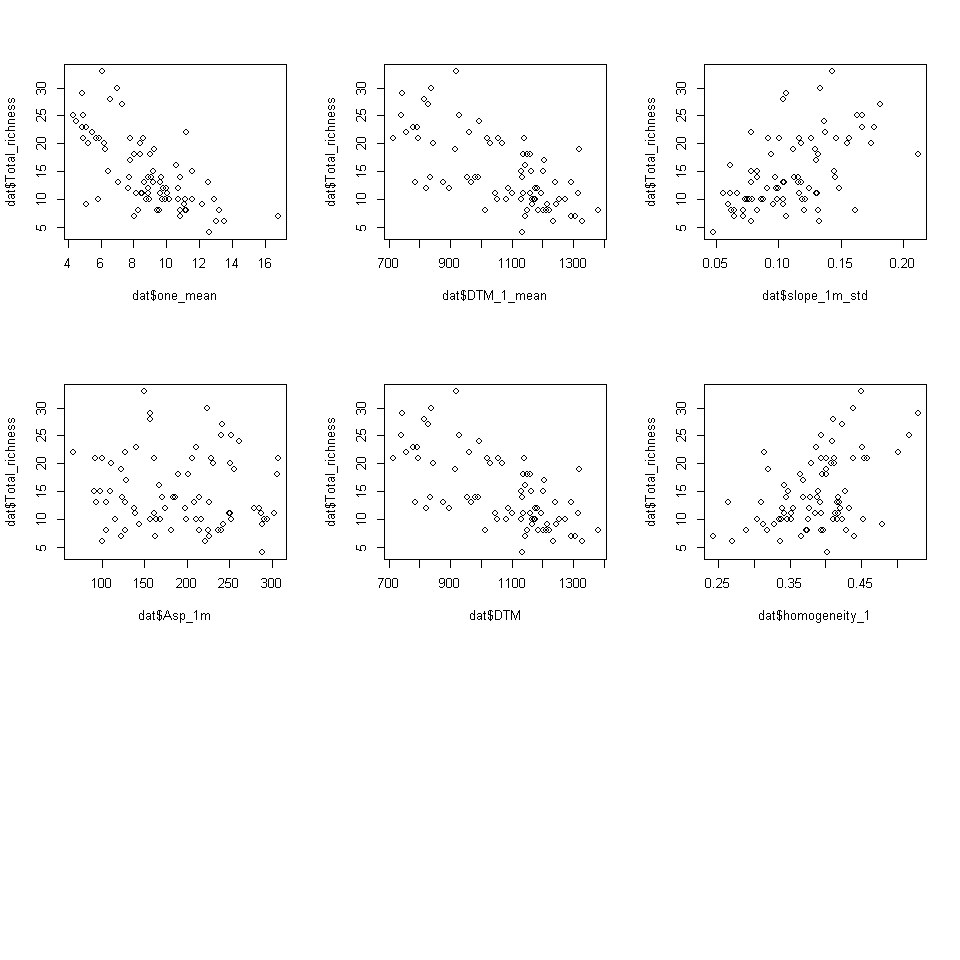

In [55]:
# Explore data using the total richness dataset ###
par(mfrow=c(3,3))
plot(dat$Total_richness ~ dat$one_mean)
plot(dat$Total_richness ~ dat$DTM_1_mean)
plot(dat$Total_richness ~ dat$slope_1m_std)
plot(dat$Total_richness ~ dat$Asp_1m)
plot(dat$Total_richness ~ dat$DTM)
plot(dat$Total_richness ~ dat$homogeneity_1)

# Do not use variables correlated with r > 0.7 at the same time. This is only a rule of thumb. 
round(cor(dat),2)   

### As species richness values are typically count data, the corresponding asymmetry and heteroscedasticity in the error distribution has to be considered. Typical family distributions for count data are: Poisson, Quasi-Poisson and Negative Binomial.
### The easier way to choose a family is looking at the QQplot and the residuals plot.

### Lets start with a simple (non-adequate) linear regression.


Call:
glm(formula = Total_richness ~ one_mean, family = gaussian(link = "identity"), 
    data = dat)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-12.2830   -2.7144   -0.3615    2.1811   13.4740  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.3216     1.9682  15.406  < 2e-16 ***
one_mean     -1.7693     0.2147  -8.242 3.78e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 22.61957)

    Null deviance: 3255.8  on 77  degrees of freedom
Residual deviance: 1719.1  on 76  degrees of freedom
AIC: 468.6

Number of Fisher Scoring iterations: 2


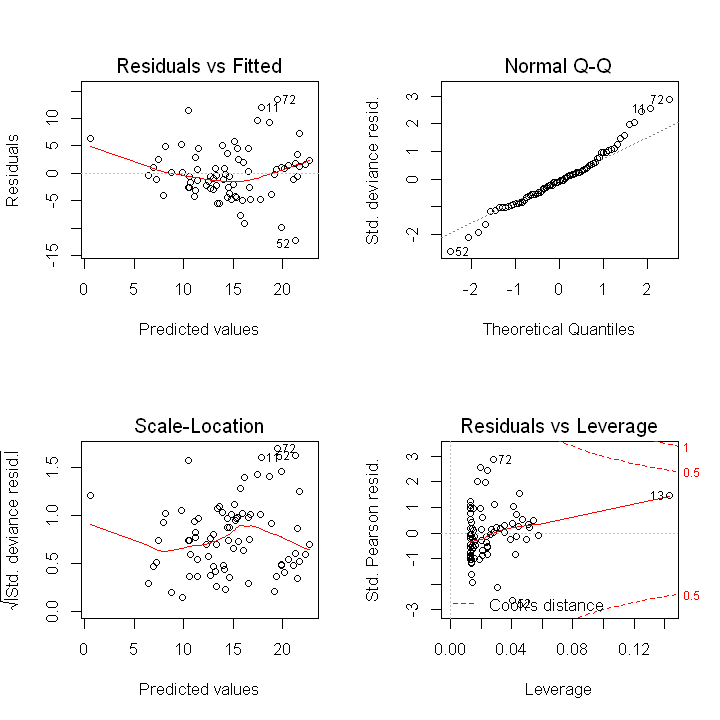

In [38]:
m1 <- glm(Total_richness ~ one_mean, data=dat, family=gaussian(link="identity"))
par(mfrow=c(2,2))
plot(m1) 
summary(m1)

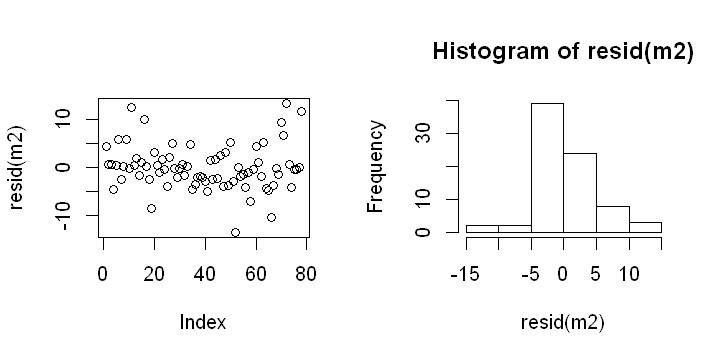

In [48]:
par(mfrow=c(1,2))
plot(resid(m2))
hist(resid(m2))

### At least log-link transformation, which sometimes helps to model count data.


Call:
glm(formula = Total_richness ~ one_mean, family = gaussian(link = "log"), 
    data = dat)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-13.4247   -2.4090   -0.2046    1.6541   13.2277  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.75774    0.11782  31.893  < 2e-16 ***
one_mean    -0.12676    0.01529  -8.293 3.03e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 21.61251)

    Null deviance: 3255.8  on 77  degrees of freedom
Residual deviance: 1642.6  on 76  degrees of freedom
AIC: 465.04

Number of Fisher Scoring iterations: 5


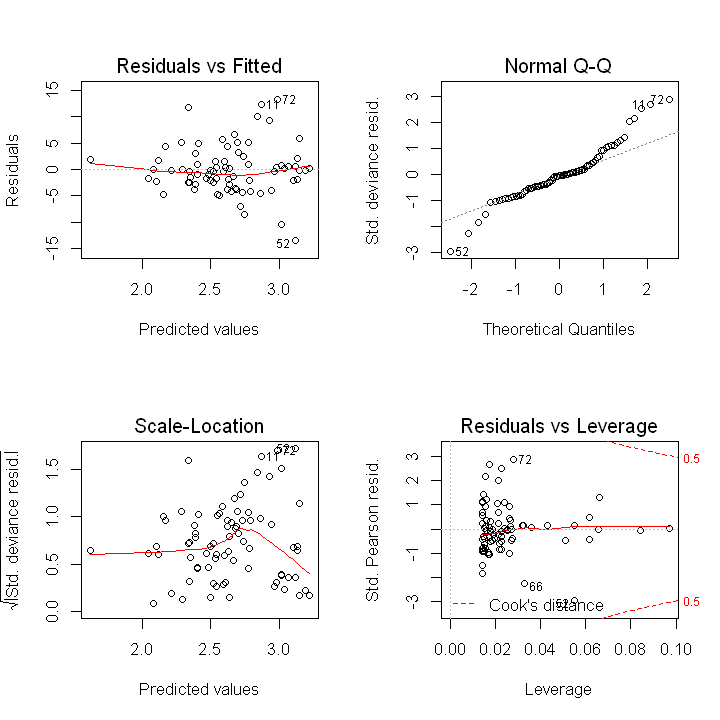

In [37]:
m2 <- glm(Total_richness ~ one_mean, data=dat, family=gaussian(link="log"))
par(mfrow=c(2,2))
plot(m2)  
summary(m2)

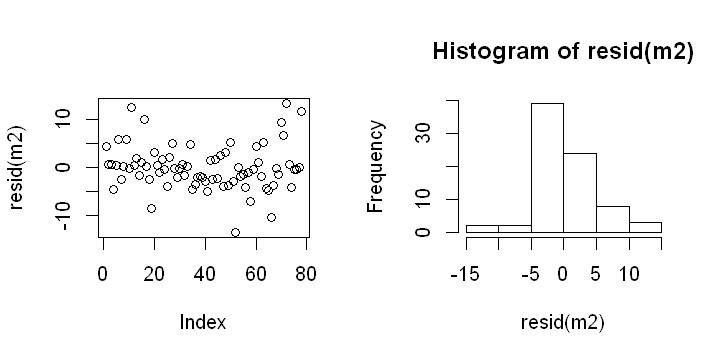

In [47]:
par(mfrow=c(1,2))
plot(resid(m2))
hist(resid(m2))

### Test Poisson family with log-link


Call:
glm(formula = Total_richness ~ one_mean, family = poisson(link = "log"), 
    data = dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2170  -0.7884  -0.0531   0.4437   3.1224  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.75051    0.10380   36.13   <2e-16 ***
one_mean    -0.12584    0.01234  -10.20   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 212.46  on 77  degrees of freedom
Residual deviance: 104.90  on 76  degrees of freedom
AIC: 455.65

Number of Fisher Scoring iterations: 4


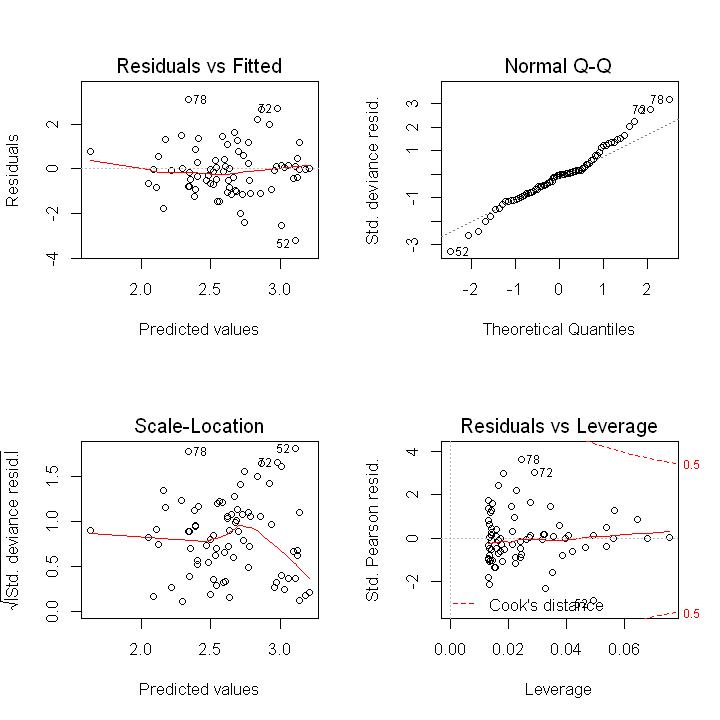

In [39]:
m3 <- glm(Total_richness ~ one_mean, data=dat, family=poisson(link="log"))
par(mfrow=c(2,2))
plot(m3)   
summary(m3)

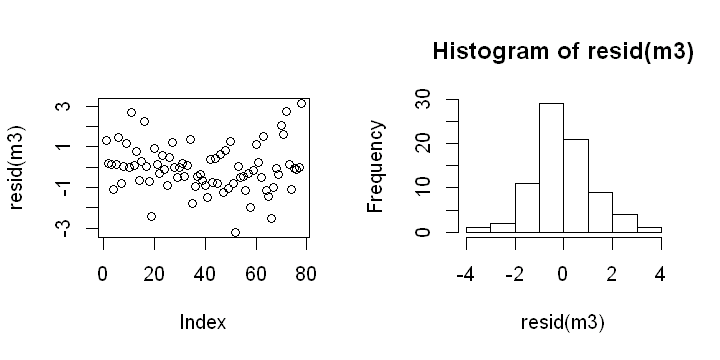

In [46]:
par(mfrow=c(1,2))
plot(resid(m3))
hist(resid(m3))

### Test Quasi-Poisson family with log-link


Call:
glm(formula = Total_richness ~ one_mean, family = quasipoisson(link = "log"), 
    data = dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2170  -0.7884  -0.0531   0.4437   3.1224  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.75051    0.12304  30.481  < 2e-16 ***
one_mean    -0.12584    0.01463  -8.601 7.77e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 1.405099)

    Null deviance: 212.46  on 77  degrees of freedom
Residual deviance: 104.90  on 76  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4


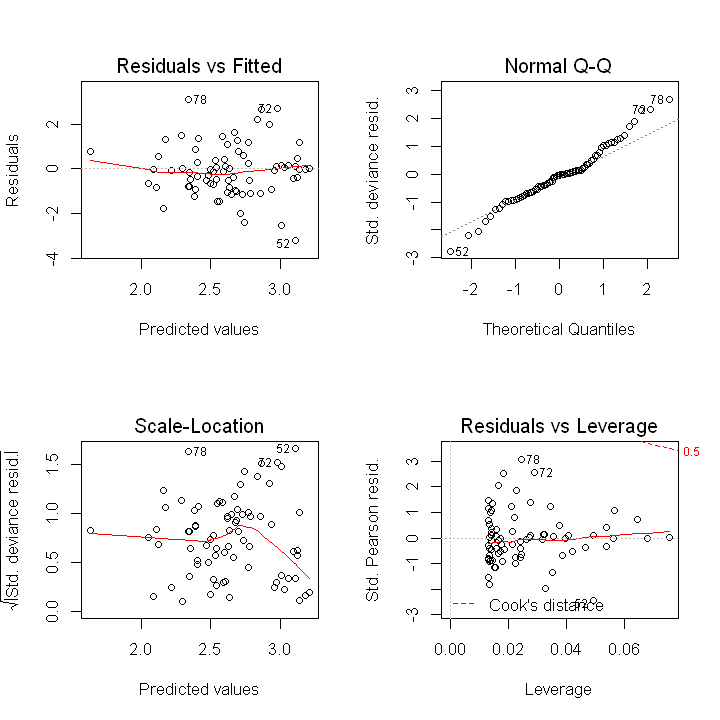

In [40]:
m4 <- glm(Total_richness ~ one_mean, data=dat, family=quasipoisson(link="log"))
par(mfrow=c(2,2))
plot(m4)   
summary(m4)

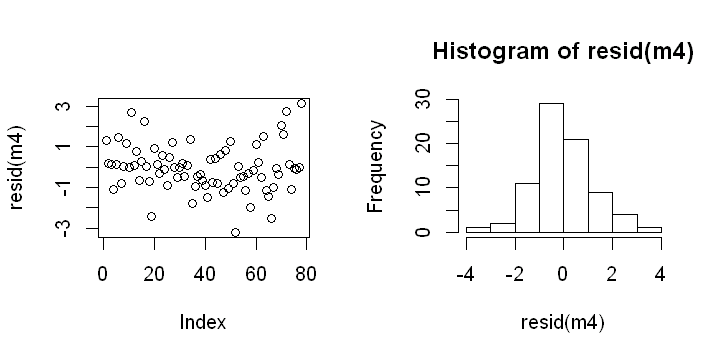

In [45]:
par(mfrow=c(1,2))
plot(resid(m4))
hist(resid(m4))

### Test Negative binomial family with theta=1. QQplot: Appears to be the best one.


Call:
glm(formula = Total_richness ~ one_mean, family = negative.binomial(theta = 1, 
    link = "log"), data = dat)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.75993  -0.23767  -0.01779   0.10644   0.81427  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.72660    0.13013  28.638  < 2e-16 ***
one_mean    -0.12302    0.01428  -8.614 7.32e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(1) family taken to be 0.09202427)

    Null deviance: 13.8177  on 77  degrees of freedom
Residual deviance:  6.9275  on 76  degrees of freedom
AIC: 577.79

Number of Fisher Scoring iterations: 4


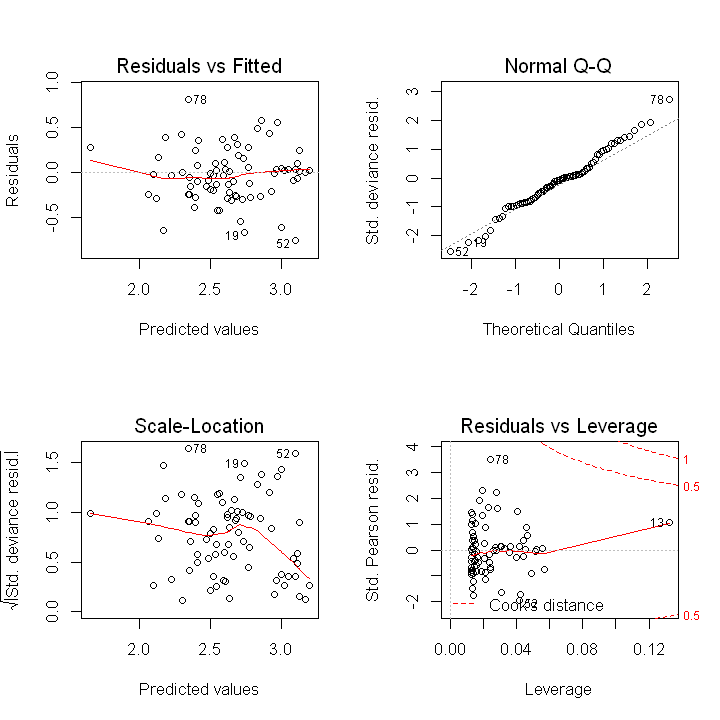

In [36]:
m5 <- glm(Total_richness ~ one_mean, data=dat, family=negative.binomial(theta = 1, link="log"))
par(mfrow=c(2,2))
plot(m5)   
summary(m5)

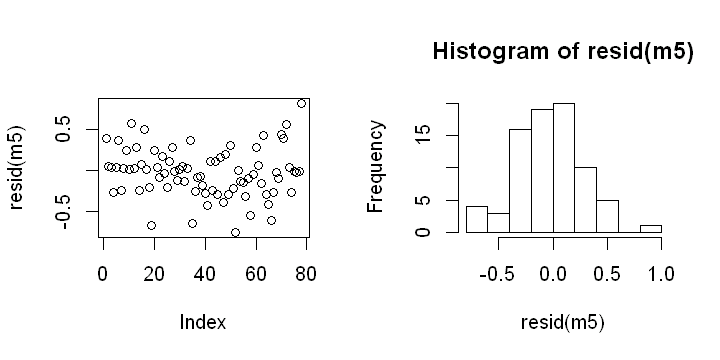

In [44]:
par(mfrow=c(1,2))
plot(resid(m5))
hist(resid(m5))

### We selected negative binomial. Let see the assumed error distribution using different theta for this model.

[1] 39.00921

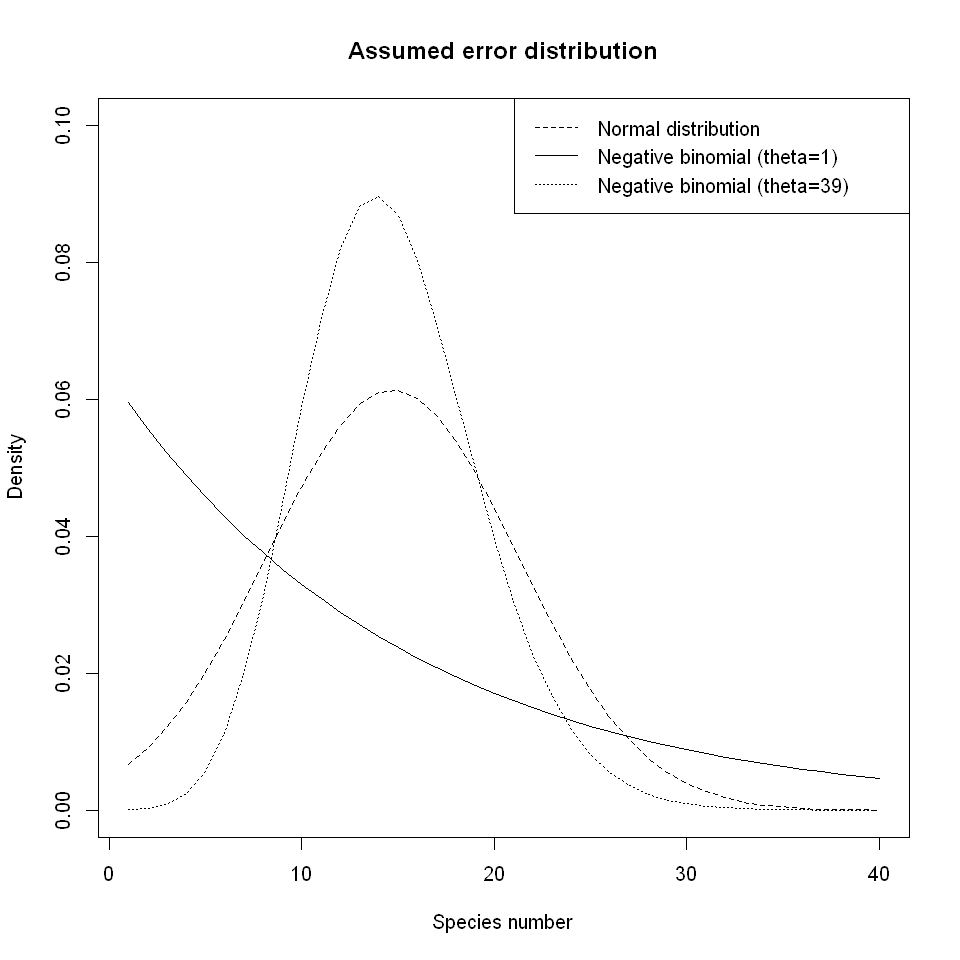

In [60]:
m5.nb <- glm.nb(Total_richness ~ one_mean, data=dat)
m5.nb$theta
theta.est <- round(m5.nb$theta,0)
x <- 1:40
par(mfrow=c(1,1))
plot(x, dnbinom(x, size=1, mu=mean(dat$Total_richness), log = FALSE), ylim=c(0,0.1), type="l", 
     main="Assumed error distribution", ylab="Density", xlab="Species number")
lines(x, dnorm(x, mean=mean(dat$Total_richness), sd=sd(dat$Total_richness)), lty=2)
lines(x,dnbinom(x, size=theta.est, mu=mean(dat$Total_richness), log = FALSE), lty=3)
legend("topright", legend=c("Normal distribution", "Negative binomial (theta=1)", 
                            paste("Negative binomial (theta=", theta.est, ")", sep="")), lty=c(2,1,3))


### Compare the bias of the regular linear regresion (gaussian) vs the bias obtained with negative binomial. The values had to be as close as possible to 1.
### Negative binomial (m5) does not have a bias at all at the link scale, which is relevant for the model algorithm.

In [66]:
lm(predict(m1, type="link") ~ dat$Total_richness -1)$coef
lm(predict(m5, type="link") ~ log(dat$Total_richness) -1)$coef
### m5 does not have a bias at all at the link scale, which is relevant for the model algorithm. 

### Back transformed: This bias is relavant for predictions.
lm(predict(m1, type="response") ~ (dat$Total_richness) -1)$coef 
lm(predict(m5, type="response") ~ (dat$Total_richness) -1)$coef 

dat$Total_richness 
          0.914694

log(dat$Total_richness) 
               1.003677

dat$Total_richness 
          0.914694

dat$Total_richness 
         0.9152625

### Check for a variable selection using hirarquical partitioning. Is a linear method that allows to select the model family. So we use it with negative binomial.

500 regressions calculated: 3595 to go...
1000 regressions calculated: 3095 to go...
1500 regressions calculated: 2595 to go...
2000 regressions calculated: 2095 to go...
2500 regressions calculated: 1595 to go...
3000 regressions calculated: 1095 to go...
3500 regressions calculated: 595 to go...
4000 regressions calculated: 95 to go...


Warning message:
: hier.part produces a rounding error if number of variables >9
See documentation.

,I
one_mean,17.06928
DTM_1_mean,16.43834
slope_1m_std,10.74803
norm_H_1_mean,2.143755
Asp_1m,2.445562
TWI_1m,8.12303
one_std,6.724389
homogeneity_1,6.247632
contrast_1,7.235061
dissimilarity_1,7.565741


[1] "one_mean"        "DTM_1_mean"      "slope_1m_std"    "TWI_1m"         
 [5] "entropy_1"       "dissimilarity_1" "second_moment_1" "contrast_1"     
 [9] "one_std"         "homogeneity_1"   "Asp_1m"          "norm_H_1_mean"

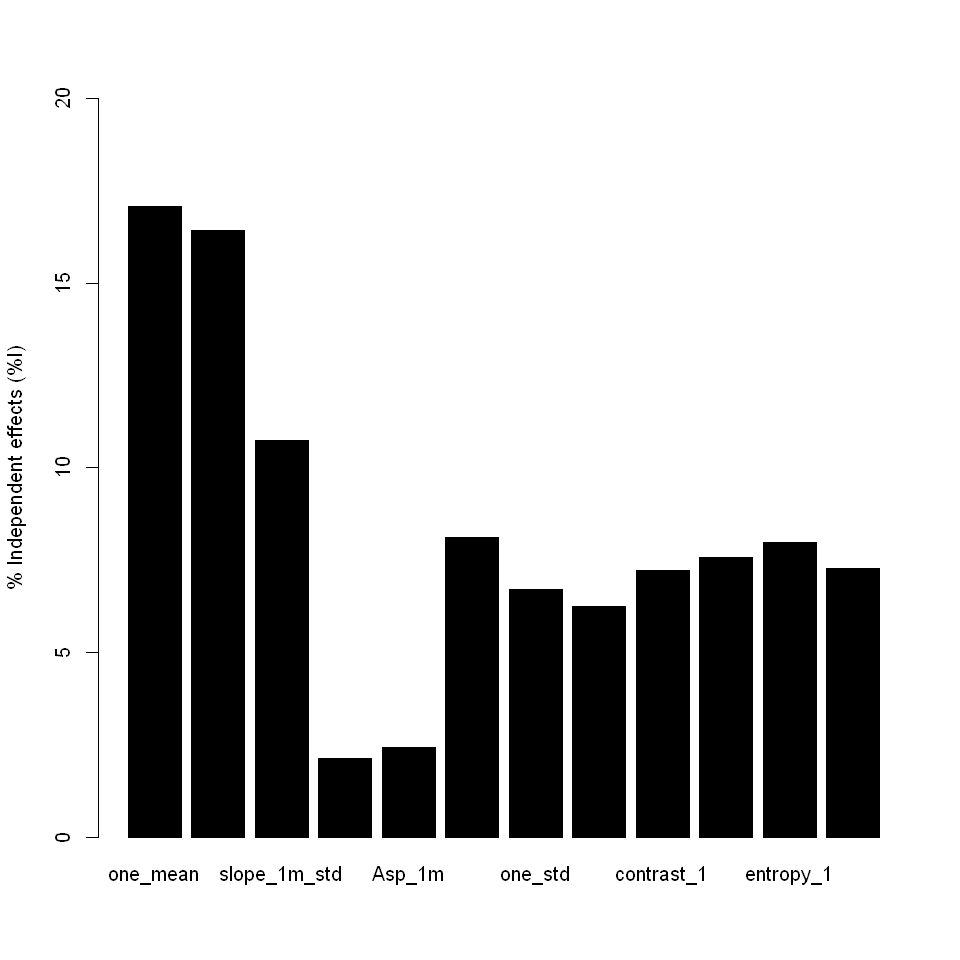

In [71]:
hp <- hier.part(dat$Total_richness, dat[,c("one_mean", "DTM_1_mean", "slope_1m_std", "norm_H_1_mean", "Asp_1m", "TWI_1m",
                                           "one_std", "homogeneity_1", "contrast_1", "dissimilarity_1", "entropy_1",
                                           "second_moment_1" )],  family=negative.binomial(theta=1 , link="log"))
hp$I.perc
o <-  order(hp$I.perc$I, decreasing=T)
rownames(hp$I.perc)[o]

### Check that the best variables are not correlated among them

In [70]:
COR<-data.frame(dat$one_mean, dat$DTM_1_mean, dat$slope_1m_std, dat$TWI_1m, dat$entropy_1, dat$second_moment_1)
COR<-cor(COR)
COR

,dat.one_mean,dat.DTM_1_mean,dat.slope_1m_std,dat.TWI_1m,dat.entropy_1,dat.second_moment_1
dat.one_mean,1.0000000,0.5071905,-0.4411427,0.3894525,0.6654368,-0.6332327
dat.DTM_1_mean,0.5071905,1.0000000,-0.2361174,0.1444776,0.5455333,-0.4896165
dat.slope_1m_std,-0.4411427,-0.2361174,1.0000000,-0.6945329,-0.3283703,0.3855518
dat.TWI_1m,0.38945254,0.14447761,-0.69453285,1.00000000,0.09633299,-0.15253195
dat.entropy_1,0.66543683,0.54553331,-0.32837030,0.09633299,1.00000000,-0.97856870
dat.second_moment_1,-0.6332327,-0.4896165,0.3855518,-0.1525319,-0.9785687,1.0000000


### The best variables are the hight canopy (one_mean), the altitude (DTM_1_mean) and the standard deviation of the slope (slope_1m_std). 